<a href="https://colab.research.google.com/github/matiuss/AlgorithmsUN2023II/blob/main/Lab7/dfmateusvGroup14Lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Group14
##LAB 7 Gale-Shapley and Irving Algorithms (Groups)  [part of the first test]

1) Find the best and worst cases for the Gale-Shapley and Irving (An Efficient Algorithm for the “Stable Roommates” Problem) Algorithms and run in Colab these algorithms for those cases for n=4 and 40.

#Gale - Shapley Algorithm

In [5]:
import numpy as np

def prefers_partner_over_current(preferences, person, current_partner, new_partner, size):
    for i in range(size):
        if preferences[person][i] == new_partner:
            return True
        if preferences[person][i] == current_partner:
            return False

def gale_shapley_algorithm(preferences, size):
    partner_of_woman = [-1 for i in range(size)]
    man_free = [False for i in range(size)]
    free_count = size

    while free_count > 0:
        man = 0
        while man < size:
            if not man_free[man]:
                break
            man += 1

        woman_index = 0
        while woman_index < size and not man_free[man]:
            woman = preferences[man][woman_index]

            if partner_of_woman[woman - size] == -1:
                partner_of_woman[woman - size] = man
                man_free[man] = True
                free_count -= 1
            else:
                current_partner = partner_of_woman[woman - size]

                if not prefers_partner_over_current(preferences, woman, current_partner, man, size):
                    partner_of_woman[woman - size] = man
                    man_free[man] = True
                    man_free[current_partner] = False
            woman_index += 1

    print("Woman\tMan")
    for i in range(size):
        print(i + size, "\t", partner_of_woman[i])

# Example usage with n = 4
size = 4
man_preferences = [list(map(lambda l: l + size, np.random.permutation(size))) for i in range(size)]
woman_preferences = [list(np.random.permutation(size)) for i in range(size)]
preferences_list = man_preferences + woman_preferences

print("n =", size)
gale_shapley_algorithm(preferences_list, size)
print()

# Example usage with n = 40
size = 40
man_preferences = [list(map(lambda l: l + size, np.random.permutation(size))) for i in range(size)]
woman_preferences = [list(np.random.permutation(size)) for i in range(size)]
preferences_list = man_preferences + woman_preferences

print("n =", size)
gale_shapley_algorithm(preferences_list, size)


n = 4
Woman	Man
4 	 3
5 	 1
6 	 0
7 	 2

n = 40
Woman	Man
40 	 27
41 	 8
42 	 39
43 	 12
44 	 19
45 	 17
46 	 9
47 	 23
48 	 36
49 	 25
50 	 38
51 	 34
52 	 2
53 	 29
54 	 37
55 	 15
56 	 32
57 	 30
58 	 28
59 	 6
60 	 20
61 	 3
62 	 22
63 	 24
64 	 4
65 	 0
66 	 16
67 	 18
68 	 21
69 	 5
70 	 10
71 	 14
72 	 7
73 	 33
74 	 1
75 	 11
76 	 35
77 	 26
78 	 13
79 	 31


#Irving Algorithm

In [9]:
import numpy as np

def stable_marriage_irving(ranking_r, ranking_h):
    # Keeps track of partners for individuals in R. Dictionary for indexing.
    num_candidates = len(ranking_r)
    r_matched = [-1 for _ in range(num_candidates)]
    h_matched = dict()

    while r_matched.count(-1) != 0:
        for r_index in range(num_candidates):
            if r_matched[r_index] == -1:
                top_choice = ranking_r[r_index][0]
                ranking_r[r_index].pop(0)  # Discard the top choice

                if top_choice not in h_matched:
                    h_matched[top_choice] = r_index
                    r_matched[r_index] = top_choice
                else:
                    current_partner = h_matched[top_choice]
                    h_preferences = ranking_h[top_choice]

                    if h_preferences.index(r_index) < h_preferences.index(current_partner):
                        h_matched[top_choice] = r_index
                        r_matched[r_index] = top_choice
                        r_matched[current_partner] = -1

    return r_matched

# Example with N = 4
num_candidates = 4
ranking_r_small = [list(np.random.permutation(num_candidates)) for _ in range(num_candidates)]
ranking_h_small = [list(np.random.permutation(num_candidates)) for _ in range(num_candidates)]
print(f"Stable marriage for N = 4: {stable_marriage_irving(ranking_r_small, ranking_h_small)}")

# Example with N = 40
num_candidates_large = 40
ranking_r_large = [list(np.random.permutation(num_candidates_large)) for _ in range(num_candidates_large)]
ranking_h_large = [list(np.random.permutation(num_candidates_large)) for _ in range(num_candidates_large)]
print(f"Stable marriage for N = 40: {stable_marriage_irving(ranking_r_large, ranking_h_large)}")


Stable marriage for N = 4: [0, 3, 2, 1]
Stable marriage for N = 40: [26, 4, 36, 12, 27, 6, 1, 24, 22, 5, 23, 13, 20, 19, 17, 32, 30, 18, 21, 11, 10, 29, 0, 34, 35, 37, 38, 7, 3, 16, 25, 31, 15, 2, 33, 39, 28, 8, 14, 9]


2) Run the Gale-Shapley Algorithm 100 times using random permutations as preference lists for n=4 and 40. Find the minimum, maximum and average number of iterations and plot the distribution of the number of iterations.

For n = 4:
Min iterations: 4
Max iterations: 8
Average iterations: 5.11


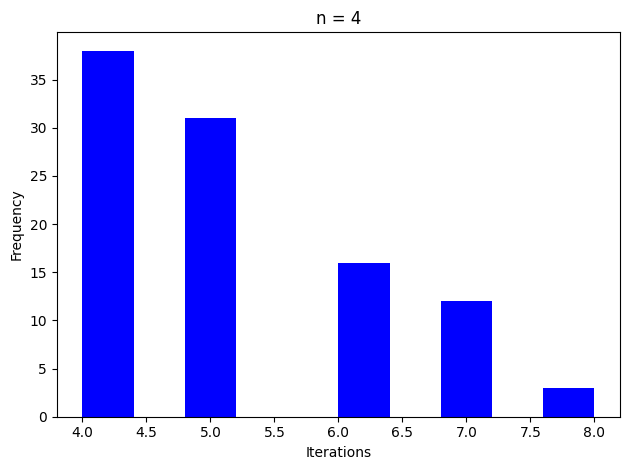

For n = 40:
Min iterations: 59
Max iterations: 101
Average iterations: 78.03


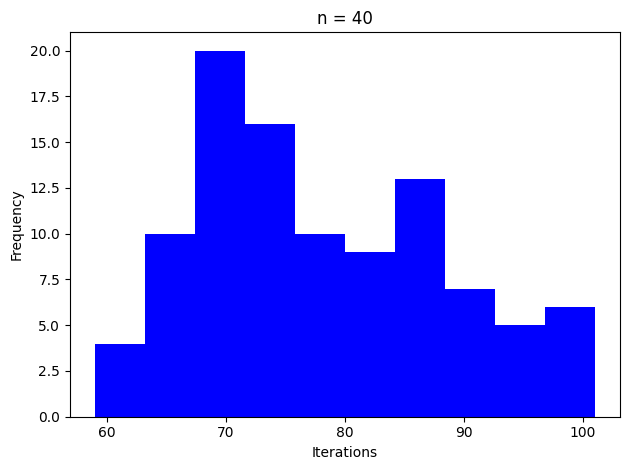

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def woman_prefers_m1_over_m(preferences, woman, man, current_partner, n):
    for i in range(n):
        if preferences[woman][i] == current_partner:
            return True
        if preferences[woman][i] == man:
            return False

def gale_shapley_algorithm(preferences, n, iterations_list):
    women_partner = [-1 for _ in range(n)]
    men_free = [False for _ in range(n)]
    free_count = n
    iterations = 0

    while free_count > 0:
        man = next((m for m in range(n) if not men_free[m]), None)

        if man is not None:
            i = 0
            while i < n and not men_free[man]:
                woman = preferences[man][i]

                if women_partner[woman - n] == -1:
                    women_partner[woman - n] = man
                    men_free[man] = True
                    free_count -= 1
                else:
                    current_partner = women_partner[woman - n]

                    if not woman_prefers_m1_over_m(preferences, woman, man, current_partner, n):
                        women_partner[woman - n] = man
                        men_free[man] = True
                        men_free[current_partner] = False

                i += 1
            iterations += 1

    iterations_list.append(iterations)
    return iterations_list

def run_experiment_and_plot(n_value, num_iterations):
    iterations_list = []

    for _ in range(num_iterations):
        men_preferences = [list(map(lambda x: x + n_value, np.random.permutation(n_value))) for _ in range(n_value)]
        women_preferences = [list(np.random.permutation(n_value)) for _ in range(n_value)]
        preferences_list = men_preferences + women_preferences

        iterations_list = gale_shapley_algorithm(preferences_list, n_value, iterations_list)

    min_iterations = min(iterations_list)
    max_iterations = max(iterations_list)
    avg_iterations = sum(iterations_list) / num_iterations

    print(f"For n = {n_value}:\nMin iterations: {min_iterations}\nMax iterations: {max_iterations}\nAverage iterations: {avg_iterations}")

    plt.hist(iterations_list, color="blue", rwidth=4)
    plt.title(f"n = {n_value}")
    plt.xlabel("Iterations")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# N = 4
run_experiment_and_plot(4, 100)

# N = 40
run_experiment_and_plot(40, 100)


3) Simulate the the Gale-Shapley and Irving algorithms using random preference lists , for n=4 and 40 and generate a gift animation fo the type show in “Illustrating the Deferred Acceptance Algorithm with R

#Gale - Shapley Algorithm gif

In [31]:
from PIL import Image, ImageDraw
import numpy as np
import random

def custom_matching_algorithm_animation(preferences):
    num_candidates = len(preferences)
    candidates = list(range(num_candidates))
    partners = {}
    frames = []  # Almacenar fotogramas para el GIF

    while len(partners) < num_candidates:
        frame = draw_frame(partners, candidates, num_candidates)
        frames.append(frame)

        if not candidates:
            break  # Terminar si todos los candidatos están comprometidos

        candidate = candidates.pop(0)
        if not preferences[candidate]:
            continue  # Saltar si la lista de preferencias está vacía
        partner = preferences[candidate].pop(0)
        current_partner = partners.get(partner)
        if current_partner is None:
            partners[partner] = candidate
        else:
            partner_preferences = preferences[partner]
            if candidate in partner_preferences and current_partner in partner_preferences:
                if partner_preferences.index(candidate) < partner_preferences.index(current_partner):
                    partners[partner] = candidate
                    candidates.append(current_partner)

    # Asegurarse de que todas las parejas estén formadas
    for partner in range(num_candidates):
        if partner not in partners:
            partners[partner] = None  # Asignar None a las parejas no formadas

    return frames

def draw_frame(partners, candidates, num_candidates):
    img = Image.new("RGB", (2000, 100), (178, 190, 181))
    draw = ImageDraw.Draw(img)
    cell_size = 50

    for i in range(num_candidates):
        draw.rectangle([(i * cell_size, 0), ((i + 1) * cell_size, cell_size)], outline="black")
        draw.rectangle([(i * cell_size, cell_size), ((i + 1) * cell_size, cell_size * 2)], outline="black")
        candidate = partners.get(i)
        if candidate is not None:
            draw.text(((i * cell_size) + 10, 10), f"MAN{candidate}", fill="black")
        draw.text(((i * cell_size) + 10, cell_size + 10), f"WOMAN{i}", fill="red")

    return img

num_candidates = 40
pref = [list(np.random.permutation(num_candidates)) for i in range(num_candidates)]
preferences = dict(zip(list(range(num_candidates)), pref))
frames = custom_matching_algorithm_animation(preferences)

frames[0].save(
    "custom_matching_algorithm_animation40.gif",
    save_all=True,
    append_images=frames[1:],
    loop=0,
    duration=400,
)



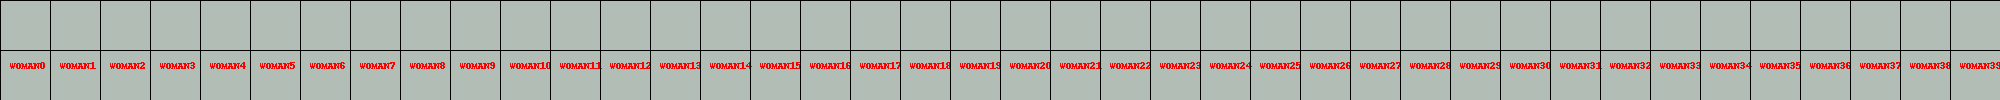

In [32]:
# Mostrar el GIF
from IPython.display import Image as IPImage
from IPython.display import display
display(IPImage(filename='custom_matching_algorithm_animation40.gif'))


#Irving Algorithm gif

In [35]:
from PIL import Image, ImageDraw
import numpy as np
import random

def custom_matching_algorithm_animation(preferences):
    num_candidates = len(preferences)
    candidates = list(range(num_candidates))
    partners = {}
    proposals = {candidate: {} for candidate in candidates}
    frames = []  # Store snapshots for GIF

    while len(partners) < num_candidates:
        frame = draw_frame(partners, candidates, num_candidates)
        frames.append(frame)

        if not candidates:
            break  # Terminate if all candidates are engaged

        candidate = candidates.pop(0)
        while True:
            partner = preferences[candidate].pop(0)
            if partner not in proposals[candidate]:
                proposals[candidate][partner] = True
                current_engagement = partners.get(partner)
                if current_engagement is None:
                    partners[partner] = candidate
                    break
                else:
                    partner_preferences = preferences[partner]
                    if candidate in partner_preferences and current_engagement in partner_preferences:
                        if partner_preferences.index(candidate) < partner_preferences.index(current_engagement):
                            partners[partner] = candidate
                            candidates.append(current_engagement)
                            break

    # Ensure all partners are engaged
    for partner in range(num_candidates):
        if partner not in partners:
            partners[partner] = None  # Assign None to unengaged partners

    return frames

def draw_frame(partners, candidates, num_candidates):
    img = Image.new("RGB", (2000, 100), (77, 77, 255))
    draw = ImageDraw.Draw(img)
    cell_size = 50

    for i in range(num_candidates):
        draw.rectangle([(i * cell_size, 0), ((i + 1) * cell_size, cell_size)], outline="black")
        draw.rectangle([(i * cell_size, cell_size), ((i + 1) * cell_size, cell_size * 2)], outline="black")
        candidate = partners.get(i)
        if candidate is not None:
            draw.text(((i * cell_size) + 10, 10), f"MAN{candidate}", fill="white")
        draw.text(((i * cell_size) + 10, cell_size + 10), f"WOMAN{i}", fill="black")

    return img

num_candidates = 40
pref = [list(np.random.permutation(num_candidates)) for i in range(num_candidates)]
preferences = dict(zip(list(range(num_candidates)), pref))
frames = custom_matching_algorithm_animation(preferences)

frames[0].save(
    "custom_matching_algorithm_animation40.gif",
    save_all=True,
    append_images=frames[1:],
    loop=0,
    duration=400,
)


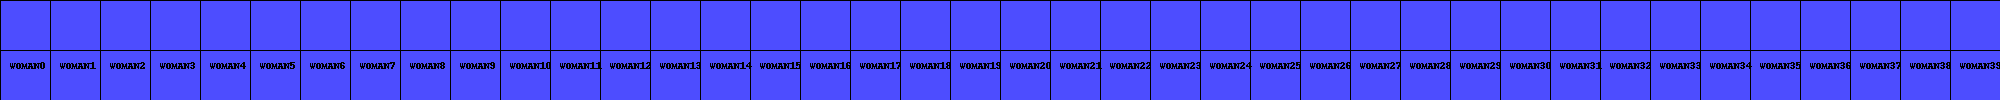

In [36]:
#gif from n = 40 Irving algorithm
from IPython.display import Image
from IPython.display import display
display(Image(filename='custom_matching_algorithm_animation40.gif'))